In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Verificar Outliers usando o inter-quartile
def is_interquartile(column:pd.Series, percentiles=(25,75))->pd.Series:
    values = column.sort_values().dropna()
    q1,q3 = np.percentile(values, percentiles)
    return (column>q1)&(column<q3)

- Verificar o início, fim e amostras aleatorias do dataset.

In [69]:
transactional = pd.read_csv("../dados/raw/transactional_data.csv",sep=";",decimal=",")

In [70]:
transactional.head(10)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237.0,9.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638.0,13.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597.0,49.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103.0,11.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224.0,10.0
5,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70002653.0,8.0
6,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001206.0,41.0
7,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70005903.0,57.0
8,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000392.0,8.0
9,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000168.0,48.0


In [71]:
transactional[-10:].head(10)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
2355232,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004706.0,21.0
2355233,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70000638.0,13.0
2355234,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70000378.0,11.0
2355235,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004228.0,10.0
2355236,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70000224.0,10.0
2355237,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004038.0,10.0
2355238,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004134.0,10.0
2355239,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70003056.0,9.0
2355240,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004185.0,13.0
2355241,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70000392.0,8.0


In [72]:
transactional.sample(10)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
38908,10210836473-BIO003,M,02/03/1966 00:00:00,2019-01-15,437706991533-179,L662,70003649.0,13.0
911153,6168185731-1,M,10/09/1965 00:00:00,2019-11-17,6168185731-1-1,L886,70005903.0,57.0
146673,7657614211-1,F,10/01/1962 00:00:00,2019-01-16,7657614211-1-1,L172,70004134.0,10.0
1074503,7658778909-1,M,03/04/1984 00:00:00,2019-10-08,7658778909-1-1,L165,70001597.0,49.0
1223764,7660146357-1,F,11/01/1988 00:00:00,2020-03-14,7660146357-2-1,L155,70003926.0,123.0
2204551,7662793841-1,F,04/06/1979 00:00:00,2020-10-02,7662793841-1-1,L523,70004461.0,94.0
1500823,10262064161-UND2243,M,02/07/1970 00:00:00,2020-06-14,572304242752-43,L137,70000301.0,12.0
54613,10225105433-BIO002,F,13/11/1965 00:00:00,2019-01-03,575301474119-75,L157,70000638.0,13.0
16969,10225662166-BIO002,M,30/11/1993 00:00:00,2019-01-08,562301507220-115,L058,70006549.0,51.0
217197,10210889015-BIO003,M,01/10/1948 00:00:00,2019-03-22,574202070437-62,L148,70001276.0,53.0


- Verificar erros de tipo

In [73]:
transactional.dtypes

Patient Id          object
Gender              object
Date of birth       object
Date of service     object
Service Id          object
Lab Id              object
CodItem            float64
Testing Cost       float64
dtype: object

In [74]:
transactional["Date of service"]=pd.to_datetime(transactional["Date of service"])
transactional["Date of birth"]=pd.to_datetime(transactional["Date of birth"])
# transactional["Testing Cost"]=transactional["Testing Cost"].str.replace(",",".").astype(float)

- Variações de entrada ao longo do tempo.

In [75]:
temp_transactional=transactional.dropna().copy()

In [76]:
temp_transactional["month-year"]=pd.to_datetime(
    temp_transactional["Date of service"].dt.month.map("{:02}".format)+"/"+
    temp_transactional["Date of service"].dt.year.astype(int).astype(str), format="%m/%Y")
temp_transactional.sort_values("Date of service")

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,month-year
105303,9999999-1,F,2010-01-01,2019-01-01,9999999-1837-1,L171,70003089.0,686.0,2019-01-01
105321,9999999-1,F,2010-01-01,2019-01-01,9999999-1818-1,L171,70008527.0,24.0,2019-01-01
105320,9999999-1,F,2010-01-01,2019-01-01,9999999-1819-1,L171,70005681.0,14.0,2019-01-01
105319,9999999-1,F,2010-01-01,2019-01-01,9999999-1820-1,L171,70007062.0,11.0,2019-01-01
105318,9999999-1,F,2010-01-01,2019-01-01,9999999-1821-1,L171,70005996.0,179.0,2019-01-01
...,...,...,...,...,...,...,...,...,...
2254129,7660258272-1,F,1930-02-24,2021-02-12,7660258272-2-1,L061,70004800.0,122.0,2021-02-01
2254130,7660258272-1,F,1930-02-24,2021-02-12,7660258272-2-1,L061,70006362.0,246.0,2021-02-01
2254131,7664158651-1,F,1972-02-20,2021-02-12,7664158651-1-1,L123,70001721.0,664.0,2021-02-01
2254105,7664158497-1,F,1941-12-01,2021-02-12,7664158497-1-1,L662,70004038.0,10.0,2021-02-01


C:\Users\Luiz Luz\AppData\Local\Temp\ipykernel_21604\2646657720.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fig=sns.lineplot(data=temp_transactional.groupby("month-year").sum().reset_index(),


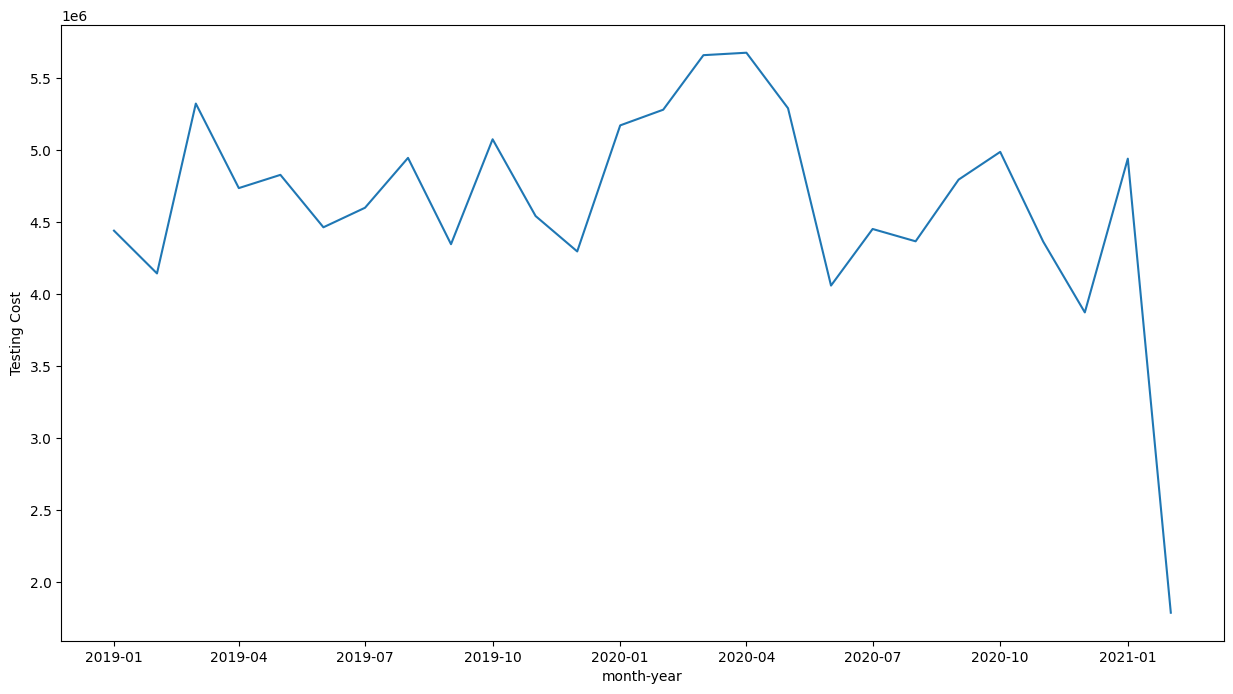

In [77]:
plt.figure(figsize=(15,8))
fig=sns.lineplot(data=temp_transactional.groupby("month-year").sum().reset_index(),
                x="month-year", y="Testing Cost")

- Analisar taxa de entradas nulas e com valor 0.

In [78]:
#Colunas com NAN
transactional.isna().sum()/transactional.count()

Patient Id         4.245850e-07
Gender             0.000000e+00
Date of birth      8.491704e-07
Date of service    4.245850e-07
Service Id         4.245850e-07
Lab Id             4.245850e-07
CodItem            8.491704e-07
Testing Cost       8.491704e-07
dtype: float64

In [79]:
# Colunaas com 0
(transactional==0).sum()

Patient Id             0
Gender                 0
Date of birth          0
Date of service        0
Service Id             0
Lab Id                 0
CodItem                0
Testing Cost       41178
dtype: int64

- Procurar por duplicatas.

In [80]:
transactional[transactional.duplicated(keep=False)].sort_values(["Service Id","Testing Cost"])

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
525181,1000061022-1,F,1980-02-06,2019-06-12,1000061022-1-1,L172,70005005.0,59.0
525182,1000061022-1,F,1980-02-06,2019-06-12,1000061022-1-1,L172,70005005.0,59.0
1667197,1000293587-1,M,1950-10-18,2020-04-22,1000293587-4-1,L138,70000180.0,12.0
1667199,1000293587-1,M,1950-10-18,2020-04-22,1000293587-4-1,L138,70000180.0,12.0
1667200,1000293587-1,M,1950-10-18,2020-04-22,1000293587-4-1,L138,70000180.0,12.0
...,...,...,...,...,...,...,...,...
106680,9999999-1,F,2010-01-01,2019-03-12,9999999-2367-1,L121,70002386.0,347.0
802707,9999999-1,F,2010-01-01,2019-07-17,9999999-2790-1,L121,70005139.0,0.0
802708,9999999-1,F,2010-01-01,2019-07-17,9999999-2790-1,L121,70005139.0,0.0
801775,9999999-1,F,2010-01-01,2019-07-17,9999999-2791-1,L139,70005139.0,0.0


- Visualizar a distribuição de cada coluna e checar se seguem uma distribuição lógica

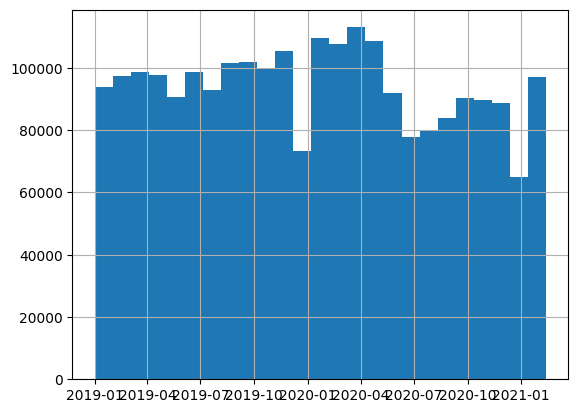

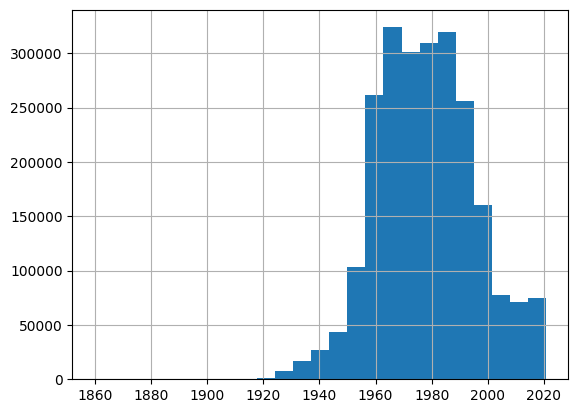

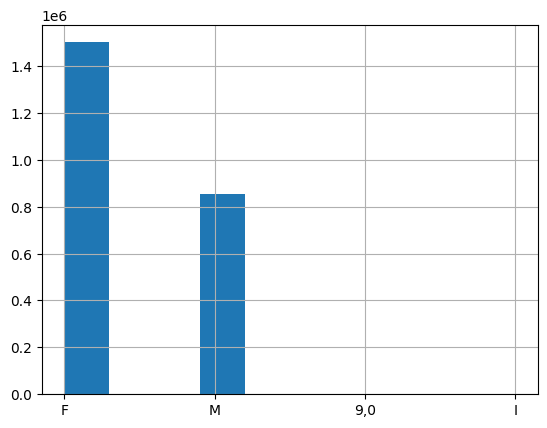

In [81]:
transactional["Date of service"].hist(bins=25)
plt.show()
transactional["Date of birth"].hist(bins=25)
plt.show()
transactional["Gender"].hist()
plt.show()

In [82]:
transactional[transactional["Gender"]=="I"]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
85069,-2,I,1900-01-01,2019-02-22,532800338922-132,L069,70003759.0,14.0
356629,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70000301.0,12.0
356630,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70001276.0,53.0
356631,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70004134.0,10.0
356632,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70003200.0,9.0
356633,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70002619.0,12.0
356634,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70002141.0,47.0
356635,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70003239.0,47.0
637179,-2,I,1900-01-01,2019-08-31,569403826990-11,L121,70006532.0,0.0
637180,-2,I,1900-01-01,2019-08-31,569403826990-11,L121,70006532.0,0.0


In [83]:
# transactional["Testing Cost"].str.replace(",",".").astype(float).plot(kind="kde")

- Verificar outliers com Z-score, interquartile e/ou scatter plots

In [84]:
transactional["Patient Id"].value_counts()

9999999-1             1428
381241267-BIO002       415
7600923838-1           397
7656548765-1           375
7659099707-1           269
                      ... 
10240438851-BIO010       1
132998231-BIO003         1
7659692434-1             1
7659716373-1             1
6169871417-1             1
Name: Patient Id, Length: 501446, dtype: int64

In [85]:
transactional[is_interquartile(transactional["Testing Cost"],percentiles=(1,99))].sort_values("Testing Cost")
# transactional[(transactional["Testing Cost"])>3].sort_values("Testing Cost")

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1705896,7660792389-1,M,2004-04-13,2020-04-28,7660792389-1-1,L158,70006996.0,3.86
221478,7656548765-1,F,1995-05-20,2019-02-21,7656548765-212-1,L121,70005741.0,4.00
221479,7656548765-1,F,1995-05-20,2019-02-21,7656548765-211-1,L121,70002329.0,4.00
105353,9999999-1,F,2010-01-01,2019-01-10,9999999-1891-1,L121,70005741.0,4.00
105327,9999999-1,F,2010-01-01,2019-01-09,9999999-1890-1,L121,70002329.0,4.00
...,...,...,...,...,...,...,...,...
106286,9999999-1,F,2010-01-01,2019-03-11,9999999-2317-1,L121,70000263.0,564.00
53011,10225705821-BIO002,M,1976-02-18,2019-03-17,573104050752-51,L139,70000200.0,564.00
2240701,7663392454-1,F,1961-09-27,2021-01-14,7663392454-2-1,L163,70000263.0,564.00
1225994,7660242460-1,M,1969-01-30,2020-03-21,7660242460-2-1,L121,70000263.0,564.00


- Verificar estatísticas básicas para cada coluna do dataset

In [64]:
transactional["Testing Cost"].describe()

count    2.355240e+06
mean     5.112762e+01
std      9.783096e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.400000e+01
75%      4.900000e+01
max      9.500000e+03
Name: Testing Cost, dtype: float64

### Observações Transacionais
- Tem um dado com sexo I, para transações sem informações do cliente, que por sinal, nasceram em 1920. Serão removidos.
- Existem algumas transações sem o ID e gênero do pacient com ID -2.
- Paciente 9999999-1 é um outlier com 1428 transações. Irei removê-lo, uma vez que não tenho como analisa-lo e identifica-lo para compreender suas particularidades. Além de que pode afetar possíveis análises de fidelidade.
- Testing cost não estava identificado como float.
- Números no padrão utf-8.
- Distribuição muito esparsa da coluna de custo.
- Muitas duplicatas. Serão removidos.
- Valor máximo de custo foge muito do inter-quartil, porém como muitos desse serviços custosos pertencem a uma mesma categoria, essa não poderia ser removida do dataset.
- Remoção de 2% de outliersa